# Exercise 2b: Arithmetic and Aggregation

## Aim: Learn to do computation with xarray

Find the teaching materials here: https://tutorial.xarray.dev/fundamentals/03.1_computation_with_xarray.html

### Issues covered: 
- Doing arithmetic on data arrays
- Using `.mean()`, `.std()`, `.max()` and `.min()`

Q1. Import the `'../data/xbhubo.pgc0apr.nc'` dataset and create the temperature data array as in the last lesson.

In [1]:
import xarray as xr

ds = xr.load_dataset('data/xbhubo.pgc0apr.nc')
temperature = ds["temp"]

Q2. Let's compare the data between the sea surface and further down. Create two temperature datasets and extract the temperature change data the sea surface and the sea bottom

In [2]:
surface_temp = temperature.isel(depth=0)
bottom_temp = temperature.isel(depth=19)


Q3. Calculate the difference in temperature the bottom of the ocean and the surface.

In [26]:
change_temp = surface_temp - bottom_temp
change_temp

<xarray.DataArray 'temp' (t: 1, latitude: 144, longitude: 288)> Size: 166kB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]],
      shape=(1, 144, 288), dtype=float32)
Coordinates:
  * longitude  (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude   (latitude) float32 576B -89.38 -88.12 -86.88 ... 88.12 89.38
  * t          (t) object 8B 1920-04-16 00:00:00

Q4. Plot the difference in these temperatures using xarrays built-in features.

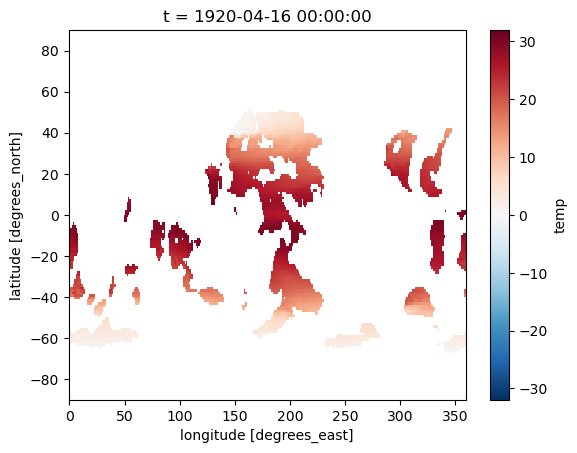

In [24]:
change_temp.plot()

Q5. Calculate the **minimum** temperature across the water depth in all locations.

In [3]:
temperature.min(dim='depth')

<xarray.DataArray 'temp' (t: 1, latitude: 144, longitude: 288)> Size: 166kB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7267456, -1.7266846, -1.726654 , ..., -1.7268372,
         -1.7268066, -1.7267761],
        [-1.751648 , -1.7536316, -1.7547607, ..., -1.7432251,
         -1.7460938, -1.7490234],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], shape=(1, 144, 288), dtype=float32)
Coordinates:
  * longitude  (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude   (latitude) float32 576B -89.38 -88.12 -86.88 ... 88.12 89.38
  * t          (t) object 8B 1920-04-16 00:00:00

Q6. Compute the global average ocean temperature change (averaged over all depths) for the entire time period in the dataset. Then display the result as a 2D depth profile.

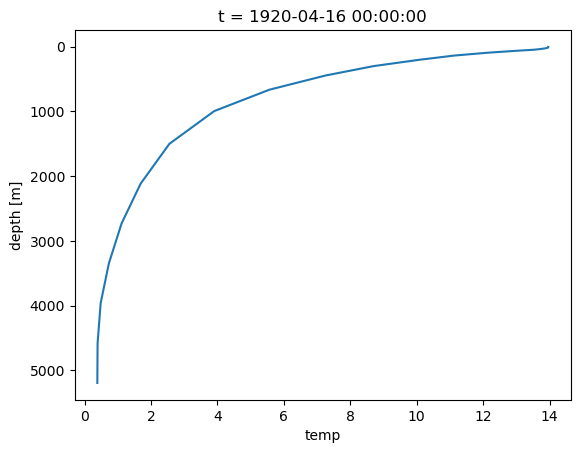

In [17]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots()

mean_temp = temperature.mean(["latitude", "longitude"])
mean_temp.plot(y='depth',ax=ax)
ax.invert_yaxis()

Q7. Calculate the zonal average temperature change for each latitude. Plot the result as a 2d contour with depth on the y axis and latitude on x.